# **Импорт всех библиотек**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as sps
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
from matplotlib import axes
import time

# **Иморт данных**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/Курсовая'

/content/drive/MyDrive/Colab Notebooks/Курсовая


In [ ]:
!ls 'Котировки акций'

AFLT_1day_01012017_01012022.txt  MAGN_1day_01012017_01012022.txt
FIVE_1day_01012017_01012022.txt  ROSN_1day_01012017_01012022.txt
FIXP_1day_01012017_01012022.txt  SBER_1day_01012017_01012022.txt
GMKN_1day_01012017_01012022.txt  VTBR_1day_01012017_01012022.txt
LKOH_1day_01012017_01012022.txt


In [ ]:
all_time = 0
start_time = time.time()
tickers = ['AFLT','FIVE', 'FIXP', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']

# Возьмём из наших данных следующие столбцы <TICKER>, <DATE>, <CLOSE> и переминуем их в 'ticker', 'date', 'price' соотвветственно.
data = []
for ticker in tickers:
  data.append(pd.read_csv('Котировки акций/'+ticker+'_1day_01012017_01012022.txt', 
                          delimiter=';', 
                          usecols=[0, 2, 4, 7],
                          header=0,
                          names=['ticker', 'date', 'open', 'close']))


for i in data:
  i['date'] = pd.to_datetime(i['date'], format = '%Y%m%d')
  i['year'] = i.date.dt.year
  i['change'] = (i['close'] - i['close'].shift(1)).fillna(0)/i['close']
  i['change_log'] = np.log(i['close']) - np.log(i['close'].shift(1))

finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 2.248713254928589 seconds ---


#**Предварительный анализ данных**

###**1. Проверим данные на количество торговых дней и удалим не подходящие нам тикеры**

In [ ]:
start_time = time.time()
frame_by_year = []
for df in data:
  frame_by_year.append(round(df.groupby(df.year).date.agg(['count']),0))
  
tab_1 = pd.concat(frame_by_year, axis=1)
tab_1.columns = tickers
tab = tab_1.T

writer = pd.ExcelWriter('Таблицы и графики/Таблица 2.Число торговых дней.xlsx') # Сохраним нашу таблицу в exel
tab.to_excel(writer)  
writer.save()

finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 0.5206685066223145 seconds ---


In [ ]:
tab

year,2017,2018,2019,2020,2021
AFLT,252.0,254.0,252.0,250.0,255.0
FIVE,NaN,234.0,252.0,250.0,255.0
FIXP,NaN,NaN,NaN,NaN,210.0
GMKN,252.0,254.0,252.0,250.0,255.0
LKOH,252.0,254.0,252.0,250.0,255.0
MAGN,252.0,254.0,252.0,250.0,255.0
ROSN,252.0,254.0,252.0,250.0,255.0
SBER,252.0,254.0,252.0,250.0,255.0
VTBR,252.0,254.0,252.0,250.0,255.0


In [ ]:
start_time = time.time()
# Из-за отсутвивя торгов удалим FIXP и FIVE 
tickers = [ticker for ticker in tickers if ticker not in ['FIXP', 'FIVE']]
data = [df for df in data if df.ticker[0] not in ['FIXP', 'FIVE']]
all_data = data

frame_by_year = []
for df in data:
  frame_by_year.append(df.groupby(df.year).date.agg(['count']))

tab_date = pd.concat(frame_by_year, axis=1)
tab_date.columns = tickers
tab = tab_date.T


finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 0.02523517608642578 seconds ---


In [ ]:
tab

year,2017,2018,2019,2020,2021
AFLT,252,254,252,250,255
GMKN,252,254,252,250,255
LKOH,252,254,252,250,255
MAGN,252,254,252,250,255
ROSN,252,254,252,250,255
SBER,252,254,252,250,255
VTBR,252,254,252,250,255


In [ ]:
all_time

2.794616937637329

###**2. Найдём максимальные относительные скачки логарифмической доходности вверх и вниз (в %)**

In [ ]:
all_time = 0
start_time = time.time()

up_changes = []
down_changes = []

for df in data:
  up_changes.append(round(df.groupby(df.year).change_log.agg(['max'])*100, 4))
  down_changes.append(round(df.groupby(df.year).change_log.agg(['min'])*100, 4))

up_result_tab = pd.concat(up_changes, axis=1)
up_result_tab.columns = tickers
up_res = up_result_tab.T
up_res['Max'] = up_result_tab.max()

down_result_tab = pd.concat(down_changes, axis=1)
down_result_tab.columns = tickers
down_res = down_result_tab.T
down_res['Min'] = down_result_tab.min()


writer = pd.ExcelWriter('Таблицы и графики/Таблица 3. Максимальные скачки вверх.xlsx') # Сохраним нашу таблицу в exel
up_res.to_excel(writer)  
writer.save()

writer = pd.ExcelWriter('Таблицы и графики/Таблица 4. Максимальные скачки вниз.xlsx') # Сохраним нашу таблицу в exel
down_res.to_excel(writer)  
writer.save()

finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 0.3349490165710449 seconds ---


In [ ]:
up_res

year,2017,2018,2019,2020,2021,Max
AFLT,7.1389,7.1605,5.5777,9.2795,4.7573,9.2795
GMKN,4.2331,6.7465,4.7648,15.8434,5.8968,15.8434
LKOH,4.9012,7.4503,4.6884,14.3438,7.1447,14.3438
MAGN,7.3299,4.3662,3.7410,6.3396,5.0511,7.3299
ROSN,3.7519,4.9162,4.6808,12.2142,5.2593,12.2142
SBER,6.0855,7.7324,2.9881,12.1320,5.5644,12.1320
VTBR,7.7128,5.6647,9.6511,8.2827,6.9177,9.6511


In [ ]:
down_res

year,2017,2018,2019,2020,2021,Min
AFLT,-8.7618,-8.8342,-4.2208,-13.0131,-5.9215,-13.0131
GMKN,-5.4536,-15.7386,-4.4281,-10.2906,-6.8372,-15.7386
LKOH,-4.4178,-8.4453,-3.7007,-20.6430,-5.2557,-20.6430
MAGN,-5.5912,-5.8258,-4.7444,-9.5050,-5.5298,-9.5050
ROSN,-3.9259,-6.4956,-3.3738,-18.5252,-6.2408,-18.5252
SBER,-3.9729,-18.6850,-5.4087,-10.0614,-5.8140,-18.6850
VTBR,-6.3998,-9.4588,-4.0822,-15.5481,-6.7656,-15.5481


### **3. Графики цен компаний с тикерами GMKN и LKOH**

In [ ]:
# Выберём нужные нам тикеры и год
ticker_1 = 'GMKN'
ticker_2 = 'LKOH'
year = 2020 # У обоих компаний максимальные скачки просиходят именно в этом году

data_GMKN = pd.read_csv('Котировки акций/'+ticker_1+'_1day_01012017_01012022.txt', 
                          delimiter=';', 
                          usecols=[0, 2, 7],
                          header=0,
                          names=['ticker', 'date', 'close'])

data_GMKN['date'] = pd.to_datetime(data_GMKN['date'], format = '%Y%m%d')
data_GMKN['year'] = data_GMKN.date.dt.year

data_LKOH = pd.read_csv('Котировки акций/'+ticker_2+'_1day_01012017_01012022.txt', 
                          delimiter=';', 
                          usecols=[0, 2, 7],
                          header=0,
                          names=['ticker', 'date', 'close'])

data_LKOH['date'] = pd.to_datetime(data_LKOH['date'], format = '%Y%m%d')
data_LKOH['year'] = data_LKOH.date.dt.year



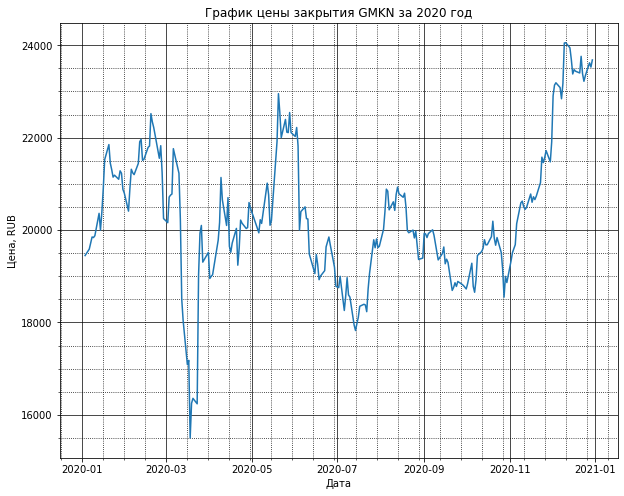

In [ ]:
# Простроим график цены закрытия для GMKN
# По оси x будут даты, по оси y - цены закрытия

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_GMKN['date'].where(data_GMKN.year == 2020), data_GMKN['close'].where(data_GMKN.year == 2020))
ax.set_title(f'График цены закрытия {ticker_1} за {year} год')
plt.xlabel('Дата')
plt.ylabel('Цена, RUB')

# Включим расширенныю сетку (внешнюю и внутреннюю) 
ax.minorticks_on() 
# Добавим и настроим параметры для основной сетки:
ax.grid(which='major', color = 'k', linewidth = 0.7)

# Добавим и настроим параметры для вспомогательной сетки:
ax.grid(which='minor', color = 'k', linestyle = ':')

# Настроим нужный нам шрифт  
font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':14}
plt.rc('font',**font)

# Сохраненим график в формате jpeg
plt.savefig('Таблицы и графики/Рис.1 График цены закрытия GMKN за 2020 год.jpeg')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


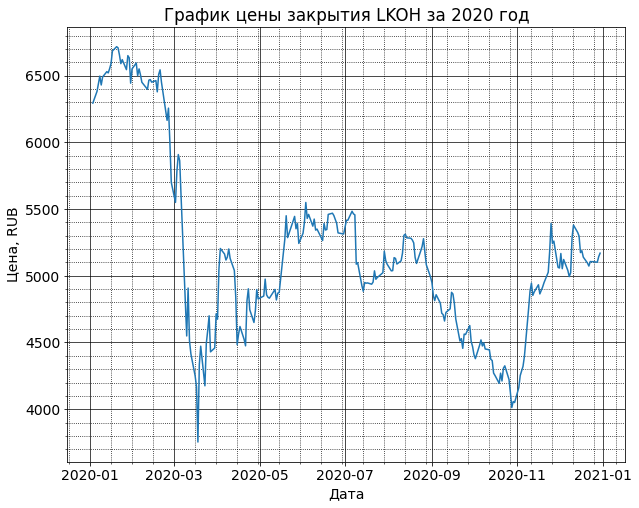

In [ ]:
# Простроим график цены закрытия для LKOH
# По оси x будут даты, по оси y - цены закрытия

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(data_LKOH['date'].where(data_LKOH.year == 2020), data_LKOH['close'].where(data_LKOH.year == 2020))
ax.set_title(f'График цены закрытия {ticker_2} за {year} год')
plt.xlabel('Дата')
plt.ylabel('Цена, RUB')
# Включим расширенныю сетку (внешнюю и внутреннюю) 
ax.minorticks_on() 
# Добавим и настроим параметры для основной сетки:
ax.grid(which='major', color = 'k', linewidth = 0.7)

# Добавим и настроим параметры для вспомогательной сетки:
ax.grid(which='minor', color = 'k', linestyle = ':')

# Настроим нужный нам шрифт  
font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':14}
plt.rc('font',**font)

# Сохраненим график в формате jpeg
plt.savefig('Таблицы и графики/Рис.2 График цены закрытия LKOH за 2020 год.jpeg')

### **4. Рассмотрим интерактивный график дневной логарифмической доходности по всем тикерам**

In [ ]:
Profitability = []
for df in data:
  Profitability.append(go.Scatter(x=df.date, y=df.change_log*100, name=df.ticker[0]))

pio.renderers.default = "colab"
fig = go.Figure(data=Profitability, layout={'title': 'Дневные логарифмические доходности акций'})
fig.update_yaxes(range=[-32, 25], title_text="Доходность  (в %)", title_standoff=15)
fig.update_xaxes(range=['2017-01-01', '2022-01-01'], title_text="Временная шкала", title_standoff=25)
fig.show()

# **Проверка гипотез на модельных данных**

### **1. Функция по оценке мат.ожидание и дисперсии сгенерированной случайной выборки** 


In [ ]:
all_time = 0
start_time = time.time()

def Evaluation_of_parameters(data):
  # Отсортируем нашу выборку
  data = sorted(data)
  # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
  m = 1+int(np.log2(len(data))) 
  # Найдём шаг разбиения выборки
  h = (max(data)-min(data))/m 
  # Список ε - централные точки отрезков разбиения, причём первая точка в разбиении - это минимум выборки 
  eps = [min(data)] 

  # Список, который будет хранить разбитые на отрезки данные
  intervals = [] 
  intervals.append([el for el in data if el < eps[-1]+h/2])

  # Пройдёмся циклом по всем интервалам 
  for i in range(2, m):
    eps.append(eps[0]+(i-1)*h)
    intervals.append([x for x in data if eps[-1]-0.5*h < x < eps[-1]+0.5*h])
    
  eps.append(eps[0]+(m-1)*h)
  intervals.append([x for x in data if x > eps[-1]-0.5*h])

  # Массив частот, в котором хранится количество элементов в интервалах
  V = [len(interv) for interv in intervals]

  # Список в который мы собирём мат. ожидание
  E_x = []
  # Циклом считаем мат. ожидание
  for i in range(len(V)):
    E_x.append(V[i]*eps[i])
  E = 1/len(data)*sum(E_x) 

  # Найдём СКО аналогично мат. ожиданию
  s = [] 
  # Циклом считаем СКО
  for i in range(len(V)):
    s.append(V[i]*(eps[i]-E)**2)
  sigma = 1/len(data)*sum(s) 

 # выводим θ1, θ2, список частот, список центральных точек отрезков разбиений
  return E, sigma, V, eps

 
finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time)) 

--- 0.00032019615173339844 seconds ---


### **2. Функция для вычисления критерия Пирсона и дальнейшие рассчёты квантилей**

In [ ]:
start_time = time.time()

def Pearson_Criterion(n):
  # Сгенерируем нормальную выборку для провеки критерия
  data = sps.norm(0, 1).rvs(n)

  # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
  m = 1+int(np.log2(n)) 
  # Найдём шаг разбиения выборки
  h = (max(data)-min(data))/m 

  # Получим наши статистические данные случаной выборки нормального распределения для дальнейшего использования критерия Пирсона:
  f = Evaluation_of_parameters(data) 
  E, sigma, V, eps = f[0], f[1], f[2], f[3] 

  # Ожидаемое распределение, с которой будем сравнивать нашу случайную выборку
  Expected_data = sps.norm(E, np.sqrt(sigma)) 

  # Создадим список с вероятностями попадания в интервалы разбиения выборки 
  P_arr = [Expected_data.cdf(eps[0]+0.5*h)]
  P_arr += [Expected_data.cdf(eps[x]+0.5*h)-Expected_data.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
  P_arr += [1-Expected_data.cdf(eps[-1]-0.5*h)]

  # Найдём статистику критерия Пирсона по формуле:
  F_chi = []
  for i in range(len(P_arr)):
    F_chi.append(((V[i]-n*P_arr[i])**2)/(n*P_arr[i]))
  chi_2 = sum(F_chi)
  # Посчитаем P - значение 
  p_value = (sps.chi2(len(V)-3).sf(chi_2))
  # В итоге функция будет возвращать статистику критерия Пирсона и p-value
  return chi_2, p_value


finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 0.00026154518127441406 seconds ---


In [ ]:
start_time = time.time()

# Количество проведённых эксперминетов для метода Монте-Карло
attempts = 10000 
# Кол-во торговых дней 
n_tickers = 252

# Создадим словарь, в котором объём выборки соответвует временным интервалам 
periods = {'Квартал': int(n_tickers/4), 'Полугодие': int(n_tickers/2) , 'Год': n_tickers}
# Создадим пустые таблицы для записи квантилей в количестве 9 и 999
df_9 = pd.DataFrame()
df_999 = pd.DataFrame()

# Теперь заполним таблицы с помощью цикла
for i, j in periods.items():
  # Вычислим критерий Пирсона 10000 раз
  #print(i, '', type(j))
  pirs_stats = [Pearson_Criterion(j) for att in range(attempts)]

  # Извлечём статистику критерия Пирсона и p_value
  chi_2, p_value = [x[0] for x in pirs_stats], [x[1] for x in pirs_stats]

  # Вычислим квантили соответвенно 
  chi_2_q999 = np.quantile(chi_2, np.arange(0.001, 1, 0.001))
  chi_2_q9 = np.quantile(chi_2, np.arange(0.1, 1, 0.1))

  # Вычислим 999 квантилей p_value и построим гистограмму (Рис.4)
  pv_q999 = np.quantile(p_value, np.arange(0.001, 1, 0.001))

  # Теперь внесём в таблицу наши значения и округлим их
  df_9[i] = np.round(chi_2_q9,7)
  df_999[i] = np.round(chi_2_q999,7)

# Отформатируем значения индексов строк в таблицах
ind = [round(i, 1) for i in list(np.arange(0.1, 1, 0.1))]
df_9.index = ind
ind = [round(i, 3) for i in list(np.arange(0.001, 1, 0.001))]
df_999.index = ind

# Сохраним наши таблицы в exel файлы
#writer = pd.ExcelWriter('Таблицы и графики/Тaблица 5.Quantiles_9.xlsx')
#df_9.to_excel(writer)  
#writer.save()

#writer = pd.ExcelWriter('Таблицы и графики/Тaблица 6.Quantiles_999.xlsx')
#df_999.to_excel(writer)  
#writer.save()

# Сохраним нашу таблицу в формате excel
df_9.to_excel('Таблицы и графики/Тaблица 5.Квантили 9.xlsx')

# Сохраним нашу таблицу в формате excel
df_999.to_excel('Таблицы и графики/Тaблица 6.Квантили 999.xlsx')

finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

--- 124.11651039123535 seconds ---


### **3. Построение гистограмм p_value**

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


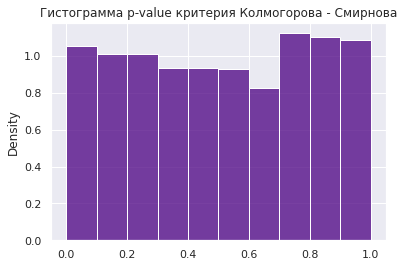

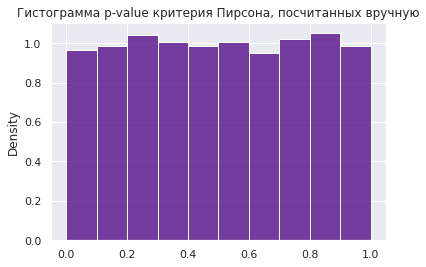

--- 113.50877022743225 seconds ---


In [ ]:
start_time = time.time()

# Кол-во торговых дней 
n_tickers = 252
# Количество проведённых эксперминетов для метода Монте-Карло
attempts = 10000 

# Критерий Пирсона chi_2 и разбиение его на 999 квантилей   
chi_2 = [Pearson_Criterion(n_tickers)[0] for i in range(attempts)]
chi_2_q999 = np.quantile(chi_2, np.arange(0.001, 1, 0.001))

# Создадим список p_value критерия Пирсона, которые вычислим вручную 
p_value_pear = []
for att in range(attempts):
  u0 = Pearson_Criterion(n_tickers)[0]
  k = 0 # Счётчик, для подсчёта критерия Пирсона вручную 
  for i in range(len(chi_2_q999)):
    if chi_2_q999[i] > u0:
      k += 1 
  p_value_pear.append(k/len(chi_2_q999)) # p_value критерия Пирсона вручную

# Создадим список p_value критерия Колмогорова - Смирнова 
p_value_kol = []
n_tickers = 250

for att in range(attempts):
  Data = sps.norm(0, 1).rvs(n_tickers)
  p_value_kol.append(sps.kstest(Data,'norm')[1]) # Добавляем наши p_value критерия Колмогорова - Смирнова в список

# Построим гистограммы и сохраним их в формате jpeg
sns.set()
font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':11}
plt.rc('font',**font)
hist = sns.histplot(p_value_kol,bins=10,stat='density', color = '#4B0082').set(title='Гистограмма p-value критерия Колмогорова - Смирнова')
#hist.set_xlabel('P-значение', fontsize=12)
plt.savefig("Таблицы и графики/Рис.4 Kolmogorov-Smirnov_test.jpeg")
#plt.grid()
plt.show()

sns.set()
font = {'family': 'serif', 'serif': 'Times New Roman', 'weight': 'normal','size':11}
plt.rc('font',**font)
hist = sns.histplot(p_value_pear,bins=10,stat='density', color = '#4B0082').set(title= 'Гистограмма p-value критерия Пирсона, посчитанных вручную')
#hist.set_xlabel('P-значение', fontsize=12)
plt.savefig("Таблицы и графики/Рис.5 Pirsons_test.jpeg")
#plt.grid()
plt.show()


finish_time = time.time()
all_time += finish_time - start_time
print("--- %s seconds ---" % (finish_time - start_time))

In [ ]:
all_time

237.62617659568787

#**Выбор альтернативной гипотезы (распределение Стьюдента) и оценка мощности критерия**

### **1. Гистограммы p_value распределения Стьюдента**

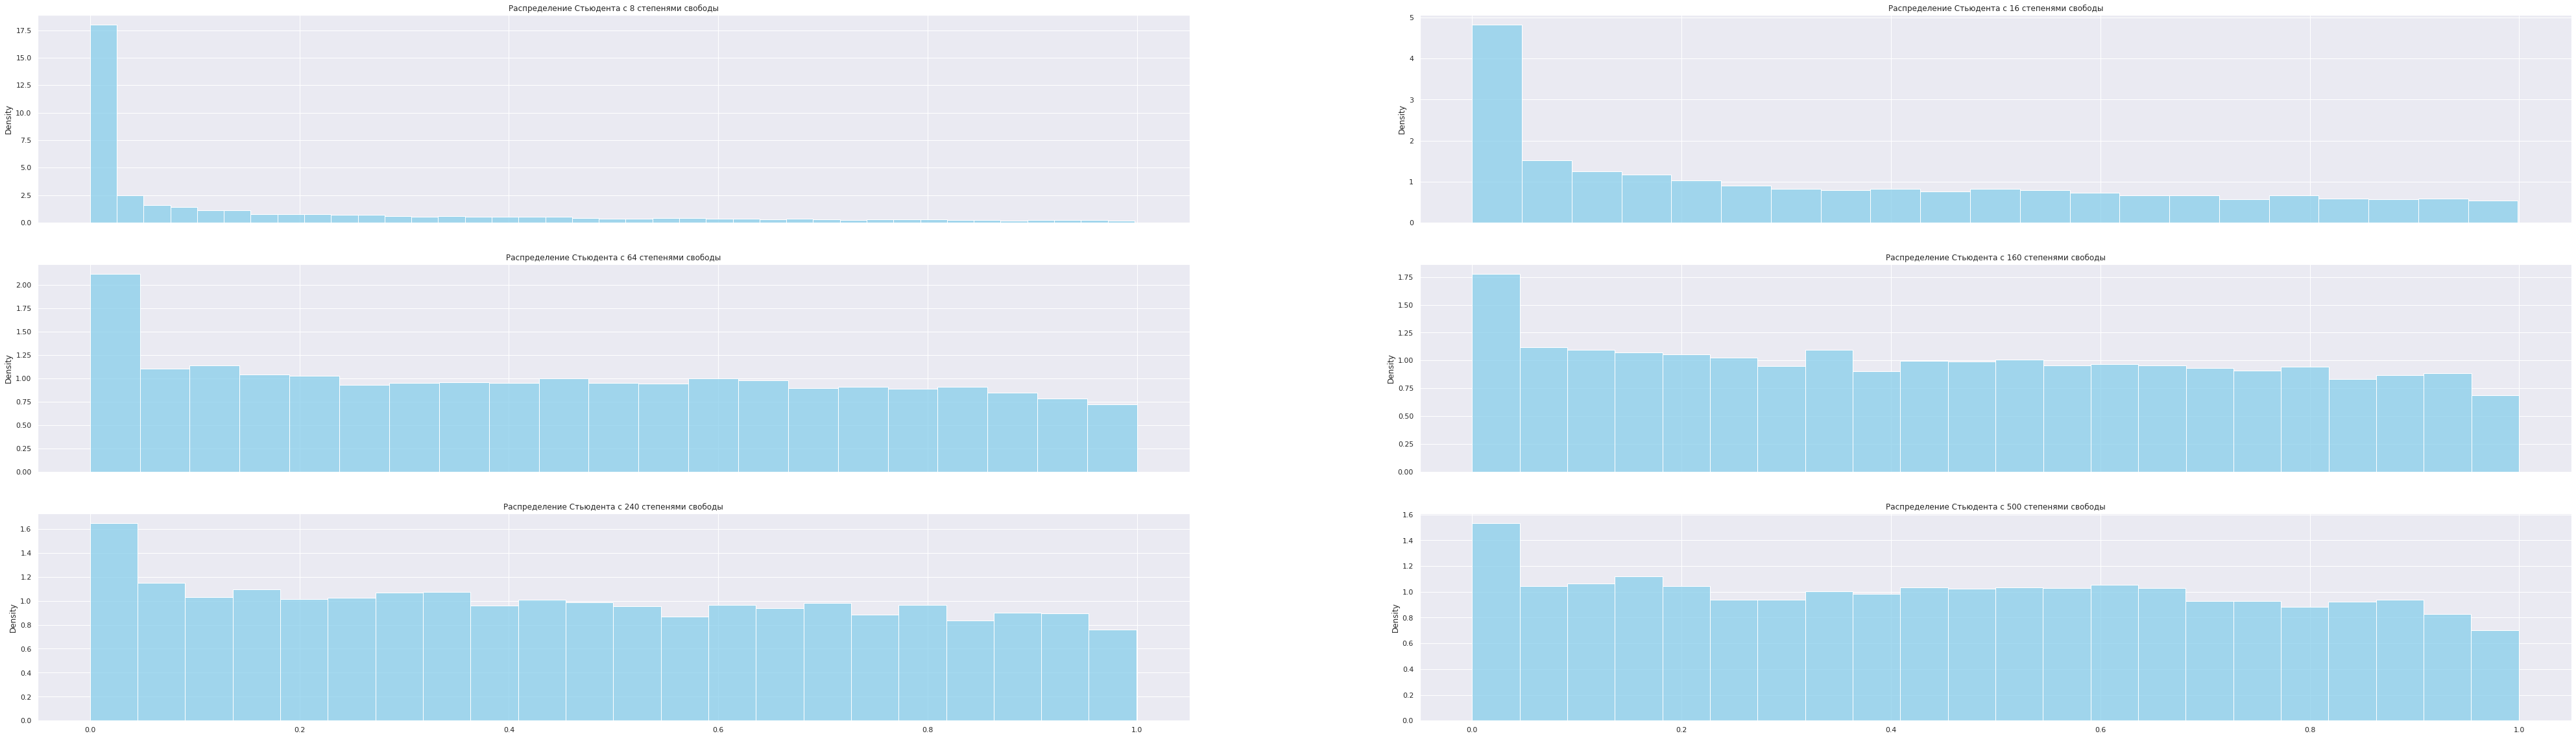

In [ ]:
# Кол-во торговых дней 
n_tickers = 252
# Количество значений статитстики 
attempts = 10000 

# Формируем область для вывода гистограмм
f, axes = plt.subplots(3, 2, figsize=(70, 20), sharex=True)

# Список степеней для распределения Стьюдента
powers = [8, 16, 64, 160, 240, 500 ]

for l, k in enumerate(powers):
  #Список со значениями p_value, полученных из критерия Пирсона
  p_value = [] 
  for att in range(attempts):
    # Для каждой степени свободы генерируем выборку распределения Стьюдента
    # (нужного нам объёма n)
    data = sps.t(k).rvs(n_tickers)
    # Повторяем все действия, которые мы делали выше в функции
    # для вычисления критерия Пирсона
    # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
    m = 1+int(np.log2(n_tickers)) 
    # Найдём шаг разбиения выборки
    h = (max(data)-min(data))/m 

    # Получим наши статистические данные случаной выборки нормального распределения для дальнейшего использования критерия Пирсона:
    f = Evaluation_of_parameters(data) 
    E, sigma, V, eps = f[0], f[1], f[2], f[3] 

    # Ожидаемое распределение, с которой будем сравнивать нашу случайную выборку
    Expected_data = sps.norm(E, np.sqrt(sigma)) 

    # Создадим список с вероятностями попадания в интервалы разбиения выборки 
    P_arr = [Expected_data.cdf(eps[0]+0.5*h)]
    P_arr += [Expected_data.cdf(eps[x]+0.5*h)-Expected_data.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
    P_arr += [1-Expected_data.cdf(eps[-1]-0.5*h)]

    # Найдём статистику критерия Пирсона по формуле:
    F_chi = []
    for i in range(len(P_arr)):
       F_chi.append(((V[i]-n_tickers*P_arr[i])**2)/(n_tickers*P_arr[i]))
    chi_2 = sum(F_chi)
    # Посчитаем и добавим p_value 
    p_value.append(sps.chi2(len(V)-3).sf(chi_2))  
  sns.set()
  sns.set_style("darkgrid")
  hist = sns.histplot(p_value , color="skyblue", ax=axes[l//2, l%2], stat='density').set_title(f'Распределение Стьюдента с {k} степенями свободы')
  #hist.set_xlabel('P-значение', fontsize=12)
  #hist.set_ylabel('Количество', fontsize=12)
  #plt.grid() 




# Построим гистограммы и сохраним их в формате jpeg 
plt.savefig("Таблицы и графики/Рис.6.2. Гистограммы по распределению Стьюдента.jpeg")

### **График плотности распределения Стьюдента при разных степенях свободы**

In [ ]:
from scipy.stats import t
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

fig, ax = plt.subplots(figsize = (15, 9))

# Создадим функцию анимации для нашего графика
def animate(i):
    ax.clear()
    N = 15000
    
    x = np.linspace(-5, 5, 10000) # Зададим значения x
      # Строим график плотности нормального распределения 
    ax.plot(x, scipy.stats.norm.pdf(x, 0, 1), color='#FF4500', label = 'Нормальное распределение') 
    ax.fill_between(x,scipy.stats.norm.pdf(x, 0, 1), # Настраиваем заливку
                  facecolor='#FF4500',
                  alpha = 0.3)
    #Строим график плотности распределения Стьюдента в зависимости от степеней свободы 
    ax.plot(x, scipy.stats.t.pdf(x, df=i), color='#00FFFF', label = 'распределения Стьюдента' )
    ax.fill_between(x,scipy.stats.t.pdf(x, df=i), # Настраиваем заливку
                facecolor='#00FFFF',
                 alpha = 0.3)
     #  Выводим график
    ax.set_title(f'График плотности распределения t(n) при n = {i}', fontsize = 22) 
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 0.45)
    ax.legend(fontsize = 15)
    
    plt.grid()
    return ax

# Вызываем функцию
dist_animation = animation.FuncAnimation(fig, animate, frames=np.arange(2, 21), interval = 250,repeat = False)

# Сохраняем интерактивный график в формате gif
f = r"Таблицы и графики/Рис. 6.2. График плотности распределения Стьюдента при разных степенях свободы.gif" 
writergif = animation.PillowWriter(fps=3) 
dist_animation.save(f, writer=writergif)

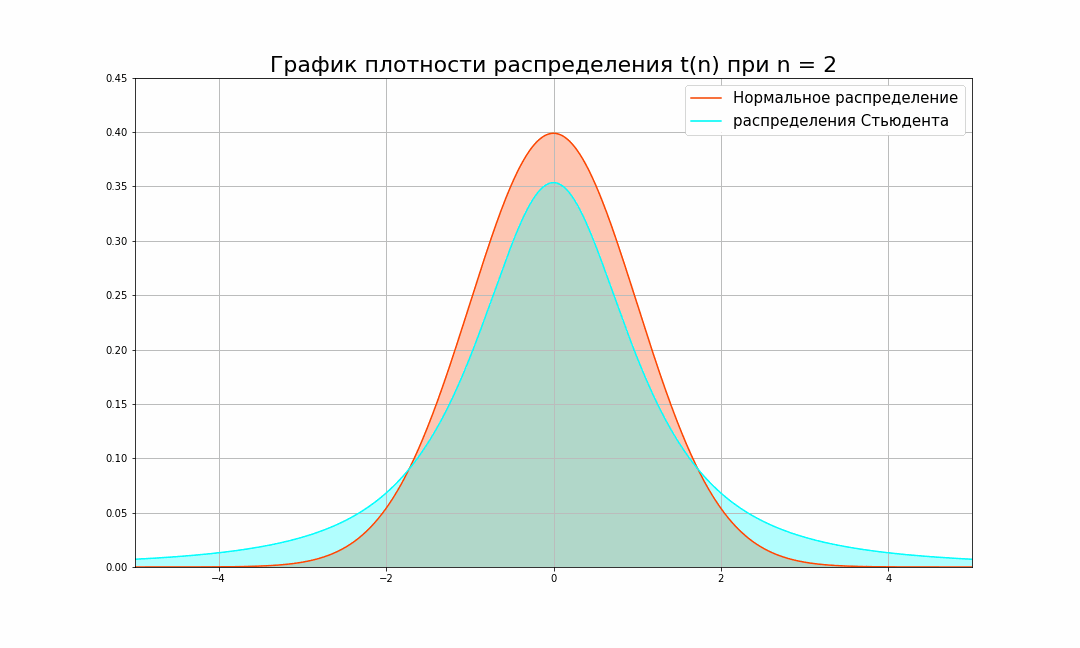


### **2. Построение таблиц мощностей для различных распеделений Стьюдента**

In [ ]:
# Кол-во торговых дней 
n_tickers = 252
# Количество значений статитстики 
attempts = 10000 
# Создадим словарь, в котором объём выборки соответвует временным интервалам 
periods = {'Квартал': int(n_tickers/4), 'Полугодие': int(n_tickers/2) , 'Год': n_tickers}

# Количество степеней свободы, с которыми мы берём распределение Стьюдента
st = [1,2,4,6,20] 
# Номер таблицы для сохранения
num_tab = 6

for power in st:
  # Создадим таблицу для мощностей критерия
  PV = pd.DataFrame(columns=list(periods.keys()))
  num_tab += 1

  # Теперь заполним таблицы с помощью цикла
  for l, n in periods.items():
    # Список со значениями p_value, полученных из критерия Пирсона
    p_value = [] 
    for att in range(attempts):
      # Для каждой степени свободы генерируем выборку распределения Стьюдента
      # (нужного нам объёма n)
      data = sps.t(power).rvs(n)
      # Повторяем все действия, которые мы делали выше в функции
      # для вычисления критерия Пирсона
        # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
      m = 1+int(np.log2(n)) 
      # Найдём шаг разбиения выборки
      h = (max(data)-min(data))/m 

      # Получим наши статистические данные случаной выборки нормального распределения для дальнейшего использования критерия Пирсона:
      f = Evaluation_of_parameters(data) 
      E, sigma, V, eps = f[0], f[1], f[2], f[3] 

      # Ожидаемое распределение, с которой будем сравнивать нашу случайную выборку
      Expected_data = sps.norm(E, np.sqrt(sigma)) 

      # Создадим список с вероятностями попадания в интервалы разбиения выборки 
      P_arr = [Expected_data.cdf(eps[0]+0.5*h)]
      P_arr += [Expected_data.cdf(eps[x]+0.5*h)-Expected_data.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
      P_arr += [1-Expected_data.cdf(eps[-1]-0.5*h)]

      # Найдём статистику критерия Пирсона по формуле:
      F_chi = []
      for i in range(len(P_arr)):
        F_chi.append(((V[i]-n*P_arr[i])**2)/(n*P_arr[i]))
      chi_2 = sum(F_chi)
      # Посчитаем и добавим p_value 
      p_value.append(sps.chi2(len(V)-3).sf(chi_2))

    # Веберем все p_value, которые будут меньше 0.05 
    PV_need = [v for v in p_value if v < 0.05 or np.isnan(v)]
    # Запишем в таблицу мощности критерия
    PV[l] = [len(PV_need)/attempts]

  # Сохраним нашу таблицу в exel
  PV.to_excel(f'Таблицы и графики/Таблица {num_tab}.Мощность критерия t({power}).xlsx')

# **Проверка гипотезы на реальных данных**

### **1. P-значение критерия Пирсона для реальных данных (период = год)**

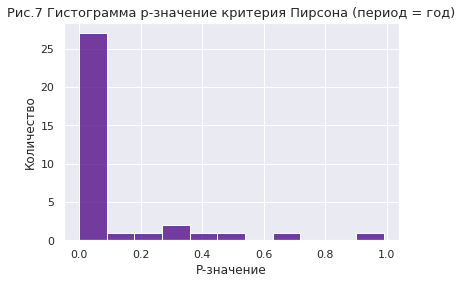

In [ ]:
# Усовершенствуем нашу функцию критерия Пирсона для обработки реальных данных
def Pirson_plus(file, start, end): 
  # Найдём объём выборки 
  n = end - start + 1
  # Считываем данные нужной нам акции  
  df_ticker = pd.read_csv(file, delimiter=';', 
                          usecols=[0, 2, 4, 7],
                          header=0,
                          names=['ticker', 'date', 'open', 'close'])
  # Производим обработку даты: приводим к нужному формату
  df_ticker['date'] = pd.to_datetime(df_ticker['date'], format = '%Y%m%d')
  df_ticker['year'] = df_ticker.date.dt.year
  # Добавляем столбец с логорфмической доходностью
  df_ticker['change_log'] = np.log(df_ticker['close']) - np.log(df_ticker['open'])

  # Теперь можем сформировать список с логарифмической доходностью
  # за определённый период акции
  data = df_ticker.change_log[start:end]

  # Повторяем все действия,которые мы делали выше в функции
  # для вычисления критерия Пирсона

  # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
  m = 1+int(np.log2(n)) 
  # Найдём шаг разбиения выборки
  h = (max(data)-min(data))/m 

  # Получим наши статистические данные случаной выборки нормального распределения для дальнейшего использования критерия Пирсона:
  f = Evaluation_of_parameters(data) 
  E, sigma, V, eps = f[0], f[1], f[2], f[3] 

  # Ожидаемое распределение, с которой будем сравнивать нашу случайную выборку
  Expected_data = sps.norm(E, np.sqrt(sigma)) 

  # Создадим список с вероятностями попадания в интервалы разбиения выборки 
  P_arr = [Expected_data.cdf(eps[0]+0.5*h)]
  P_arr += [Expected_data.cdf(eps[x]+0.5*h)-Expected_data.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
  P_arr += [1-Expected_data.cdf(eps[-1]-0.5*h)]

  # Найдём статистику критерия Пирсона по формуле:
  F_chi = []
  for i in range(len(P_arr)):
    F_chi.append(((V[i]-n*P_arr[i])**2)/(n*P_arr[i]))
  chi_2 = sum(F_chi)
  # Посчитаем P - значение 
  p_value = (sps.chi2(len(V)-3).sf(chi_2))

  # В итоге функция будет возвращать статистику критерия Пирсона и p-value (округляем до 4 знака для удобства)
  return chi_2, round(p_value,4)

# Список с годами торгов акций
years = range(2017, 2022)
# Создадим пустую таблицу для P-значений критерия Пирсона 
df = pd.DataFrame(columns=years)

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']

# Создадим список для P-значений посчитанного критерия Пирсона (для реальных данных)
p_value_pirs = [] 

# Циклом пройдёмся по всем тикерам 
for ticker in tickers:
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Вспомогательный список для P-значений
  l_p_value = []
  # Список с периодами (на какие индексы мы разбиваем наши данные) 
  period_array = [1]
  # Циклом пройдёмся по годам  
  for i in years:
    # Обновляем два значения периода (start и end)
    period_array = [period_array[0], period_array[0] + tab_date[ticker][i]] # tab_date - таблица с кол-вом торговых дней по годам у акции (см.выше)  
    # Считаем P-значение с помощью функции, написанной выше
    l_p_value.append(Pirson_plus(file=file, start=period_array[0], end=period_array[1])[1]) # Извлекаем p_value
    # Обновляем два значения периода (start и end)
    period_array = period_array[1:]
  # Теперь заполняем таблицу и добавляем данные для гистограммы
  df.loc[ticker] = l_p_value 
  p_value_pirs += l_p_value

# Сохраним нашу таблицу в формате excel
df.to_excel('Таблицы и графики/Таблица 12. P-значение критерия Пирсона по годам.xlsx')

# Построим гистограмму и сохраним их в формате jpeg 
sns.set()
hist = sns.histplot(p_value_pirs,bins=10,binwidth=0.09, color = '#4B0082')
hist.set_title('Рис.7 Гистограмма p-значение критерия Пирсона (период = год)', fontsize=13)
hist.set_xlabel('P-значение', fontsize=12)
hist.set_ylabel('Количество', fontsize=12)
plt.savefig("Таблицы и графики/Рис.7 Гистограмма p-значение критерия Пирсона.jpeg")

In [ ]:
traces = []
for df1 in all_data:
  traces.append(go.Histogram(x=df1.change_log, histnorm='probability', name=df1.ticker[0]))

# добавим функцию полности распределения нормального закона для сравнения
traces.append(go.Scatter(x=np.linspace(-1, 1, 100), y=sps.norm.pdf(np.linspace(-1, 1, 100)), name='norm.pdf'))

pio.renderers.default = "colab"
fig = go.Figure(data=traces, layout={'title': 'Рис.8. Гистограмма относительных частот лог.доходностей акций за всё время'})
fig.update_yaxes(title_text="Относительная частота", title_standoff=15)
fig.update_xaxes( title_text="Значение", title_standoff=25)
fig

In [ ]:
print(sps.kstest(p_value_pirs,'uniform')) # Найдём P-значение по критерию Колмогорова-Смирнова

KstestResult(statistic=0.7280285714285715, pvalue=1.982786507496267e-19)


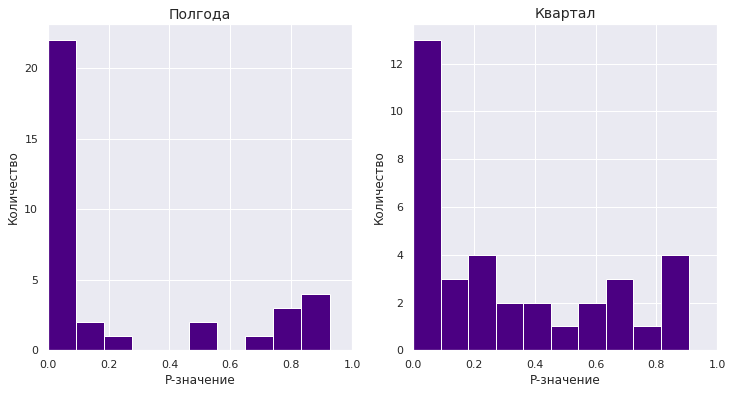

In [ ]:
# Аналогично посчитаем Гистограмма p-value критерия Пирсона для других периодов

# Список с годами торгов акций
years = range(2017, 2022)

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']

# Создадим список для P-значений посчитанного критерия Пирсона (для реальных данных)
p_value_half = []
p_value_quart = [] 

# Циклом пройдёмся по всем тикерам 
for index,ticker in enumerate(tickers):
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Вспомогательный списки для P-значений
  l_p_value, k_p_value = [], []
  # Список с периодами (на какие индексы мы разбиваем наши данные) 
  period_array_h = [1] # для полугодия
  period_array_q = [1] # для кварталов
  # Циклом пройдёмся по годам  
  for i in years:
    # all_data - это изначально обработанный датафрейм со всеми акциями (см.выше)
    dframe = all_data[index]
    dframe['date'] = pd.to_datetime(dframe['date']) # Преобразуем данные в нужный тип даты
    dframe = dframe.set_index('date') 
    data_per_q = dframe.ticker.resample('Q').count().to_period('Q') # По кварталам

    # Обновляем два значения периода (start и end)
    period_array_q = [period_array_q[0], period_array_q[0] + data_per_q[str(i)+'Q1']] # data_per_q - таблица с кол-вом торговых дней по кварталам у акции  
    period_array_h = [period_array_h[0], period_array_h[0] + data_per_q[str(i)+'Q1'] + data_per_q[str(i)+'Q2']] # Считаем индексы для полугодия
    # Считаем P-значение с помощью функции, написанной выше
    l_p_value.append(Pirson_plus(file=file, start=period_array_h[0], end=period_array_h[1])[1]) # Извлекаем p_value
    k_p_value.append(Pirson_plus(file=file, start=period_array_q[0], end=period_array_q[1])[1]) # Извлекаем p_value
    # Обновляем два значения периода (start и end)
    period_array_q = period_array_q[1:]
    period_array_q = [period_array_q[0] + data_per_q[str(i)+'Q2'] + data_per_q[str(i)+'Q3'] + data_per_q[str(i)+'Q4']]

    period_array_h = period_array_h[1:]
    period_array_h = [period_array_h[0] + data_per_q[str(i)+'Q3'] + data_per_q[str(i)+'Q4']]
    
  # Теперь заполняем таблицу и добавляем данные для гистограммы
  p_value_half += l_p_value
  p_value_quart += k_p_value


# Построим гистограммы и сохраним их в формате jpeg 
sns.set()
f, axes = plt.subplots(1, 2, figsize = (12,6))
axes[0].hist(p_value_half, bins=10, color = '#4B0082')
axes[0].set_xlabel('P-значение', fontsize=12)
axes[0].set_ylabel('Количество', fontsize=12)
axes[0].set_title('Полгода', fontsize=14)
axes[0].set_xlim(0,1)

axes[1].hist(p_value_quart, bins=10, color = '#4B0082')
axes[1].set_xlabel('P-значение', fontsize=12)
axes[1].set_ylabel('Количество', fontsize=12)
axes[1].set_title('Квартал', fontsize=14)
axes[1].set_xlim(0,1)

plt.savefig("Таблицы и графики/Рис.9 Гистограмма p-значение критерия Пирсона для разных периодов.jpeg")

In [ ]:
df

,2017,2018,2019,2020,2021
AFLT,0.0000,0.0000,0.0000,0.0,0.0037
GMKN,0.9669,0.0000,0.0019,0.0,0.0000
LKOH,0.0008,0.0000,0.1495,0.0,0.0117
MAGN,0.3877,0.5017,0.6886,0.0,0.0215
ROSN,0.2827,0.0000,0.0434,0.0,0.0000
SBER,0.3544,0.0000,0.2548,0.0,0.0000
VTBR,0.0000,0.0000,0.0000,0.0,0.0000


In [ ]:
# Найдём все доли проверок, для которых гипотеза принималась и составим таблицу
# Зададим доли для 1%, 5%, 10% соответственно 
p_v001, p_v005, p_v010 = 0, 0, 0
p_v = pd.DataFrame(columns=['1%','5%','10%']) # Формируем заголовки колонок таблицы
# Пробегаемся циклом по всем ячейкам таблицы 
for j in range(len(tickers)):
  for i in range(len(years)):
    # Проверяем условия 
    if df.iloc[j,i] > 0.01:
      p_v001 = p_v001 + 1 
    elif df.iloc[j,i] > 0.05: 
      p_v005 = p_v005 + 1 
    elif df.iloc[j,i] > 0.1: 
      p_v010 = p_v010 + 1
# Сотвественно находим доли и добавляем в таблицу
percent = [round(p_v001/len(tickers)/len(years),3),round(p_v005/len(tickers)/len(years),3),round(p_v010/len(tickers)/len(years),3)]
p_v.loc[0] = percent

# Сохраним нашу таблицу в формате excel
p_v.to_excel('Таблицы и графики/Таблица 13. Доля проверок, для которых гипотеза принималась.xlsx')

# **Проверка гипотезы на реальных данных при разных объемах торгов**

### **Гистограммы P-значения критерия Пирсона для реальных данных за все года**

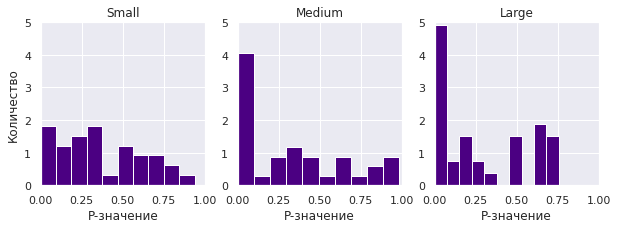

In [ ]:
def Volumes(file, start, end):
  # Считываем данные нужной нам акции  
  df_ticker = pd.read_csv(file, delimiter=';', 
                          usecols=[0, 2, 4, 7, 8],
                          header=0,
                          names=['ticker', 'date', 'open', 'close', 'volume'])
  
  # Производим обработку даты: приводим к нужному формату
  df_ticker['date'] = pd.to_datetime(df_ticker['date'], format = '%Y%m%d')
  df_ticker['year'] = df_ticker.date.dt.year
  # Считаем среднюю цену как среднее между 'close' и 'open' 
  df_ticker['new_price'] = (df_ticker['close'] + df_ticker['open']) / 2
  # Находим объём торгов денежном соотношении 
  df_ticker['new_vol'] = df_ticker['new_price'] * df_ticker['volume']
  # Вычисляем логарифмическую доходность по средней цене и добавляем в таблицу
  df_ticker['change_log'] = np.log(df_ticker['close'] / df_ticker['new_price'])

  return df_ticker.loc[start:end] # Срезом выбираем нужный период данных для исследования


def Pirsons_volume(file, size, start, end):
  # При помощи функции Volumes загружаем нашу таблицу за нужный период 
  df = Volumes(file=file, start=start, end=end)
  df.index = range(df.shape[0])

  # Теперь находим квантили 1/3 и 2/3 уровней в столбце нового объема продаж
  quant = np.quantile(df['new_vol'], np.arange(0, 1, 1/3)[1:])
  # Создаём список для сохранения туда лог доходности по объёмам торгов 
  data = []

  # Разбиваем данные в соответсвии с нужным параметром size, который определяет нужный нам объём 
  # Для этого используем логическую конструкцию и квантили, которые посчитали выше 
  if size == 1: # малый объём выборки
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] <= quant[size - 1]:
        data.append(df.at[i,'change_log'])
  elif size == 2: # средний объём выборки
    for i in range(df.shape[0]):
      if quant[size - 2] < df.at[i,"new_vol"] <= quant[size - 1]:
        data.append(df.at[i,'change_log'])
  else: # большой объём выборки
    for i in range(df.shape[0]): 
      if df.at[i,"new_vol"] > quant[size - 2]:
        data.append(df.at[i,'change_log'])
  
  # Повторяем все действия,которые мы делали выше в функции
  # для вычисления критерия Пирсона
  n = len(data)
  # Найдём количество интервалов разбиения выборки по правилу Стёрджеса
  m = 1+int(np.log2(n)) 
  # Найдём шаг разбиения выборки
  h = (max(data)-min(data))/m 

  # Получим наши статистические данные случаной выборки нормального распределения для дальнейшего использования критерия Пирсона:
  f = Evaluation_of_parameters(data) 
  E, sigma, V, eps = f[0], f[1], f[2], f[3] 

  # Ожидаемое распределение, с которой будем сравнивать нашу случайную выборку
  Expected_data = sps.norm(E, np.sqrt(sigma)) 

  # Создадим список с вероятностями попадания в интервалы разбиения выборки 
  P_arr = [Expected_data.cdf(eps[0]+0.5*h)]
  P_arr += [Expected_data.cdf(eps[x]+0.5*h)-Expected_data.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
  P_arr += [1-Expected_data.cdf(eps[-1]-0.5*h)]

  # Найдём статистику критерия Пирсона по формуле:
  F_chi = []
  for i in range(len(P_arr)):
    F_chi.append(((V[i]-n*P_arr[i])**2)/(n*P_arr[i]))
  chi_2 = sum(F_chi)
  # Посчитаем P - значение 
  p_value = (sps.chi2(len(V)-3).sf(chi_2))

  # В итоге функция будет возвращать статистику критерия Пирсона и p-value (округляем до 4 знака для удобства)
  return chi_2, round(p_value,4)

# Новый список для заполнения P-значения
p_value = [] 
# Таблица с P-значением в зависимости от объёмов торгов
df_pv = pd.DataFrame(columns=['Small','Medium','Large'])
# Словарь объёмов торгов для функции и графиков
sizes = {'Small': 1,'Medium': 2,'Large': 3} 
# Года за которые будем рассматривать данные 
years = range(2017, 2022)
# Конкретный год (2019) для рассмотрения отдельно
year = 2019

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']
# Новые списки для заполнения P-значения для разных объемов продаж
l1_p, l2_p, l3_p = [], [], [] 

# Пройдёмся циклом по всем тикерам 
for ticker in tickers:
  # Создадим списки для сохранения P-значения в зависимости от объёмов торгов
  pv_f_t1, pv_f_t2, pv_f_t3 = [], [], []
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Список с периодами (на какие индексы мы разбиваем наши данные) 
  period_array = [1]
  # Циклом пройдёмся по годам
  for y in years:
    # Обновляем два значения периода (start и end)
    period_array = [period_array[0], period_array[0] + tab_date[ticker][y]] # tab_date - таблица с кол-вом торговых дней по годам у акции (см.выше)
    # Считаем P-значение с помощью функции, написанной выше
    l1_p.append(Pirsons_volume(file, size=1, start=period_array[0], end=period_array[1])[1])
    l2_p.append(Pirsons_volume(file, size=2, start=period_array[0], end=period_array[1])[1])
    l3_p.append(Pirsons_volume(file, size=3, start=period_array[0], end=period_array[1])[1])

    pv_f_t1.append(Pirsons_volume(file, size=1, start=period_array[0], end=period_array[1])[1])
    pv_f_t2.append(Pirsons_volume(file, size=2, start=period_array[0], end=period_array[1])[1])
    pv_f_t3.append(Pirsons_volume(file, size=3, start=period_array[0], end=period_array[1])[1])

    # Обновляем два значения периода (start и stop)
    period_array = period_array[1:]
  # Суммируем общее P-значение 
  p_value += l1_p + l2_p + l3_p
  # Заполняем таблицу с P-значением в зависимости от объёмов торгов 
  df_pv.loc[ticker] = 0
  df_pv['Small'][ticker] = sum(pv_f_t1)/len(pv_f_t1) 
  df_pv['Medium'][ticker] = sum(pv_f_t2)/len(pv_f_t2)
  df_pv['Large'][ticker] = sum(pv_f_t3)/len(pv_f_t3)

  
# Построим гистограммы и сохраним их в формате jpeg 
sns.set()
fig,ax = plt.subplots(1,3,figsize=(10,3))
size=list(sizes.keys())
# 1 гисторграмма
ax[0].hist(l1_p,density=True, color = '#4B0082')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,5)
ax[0].set_title(size[0])
ax[0].set_xlabel('P-значение', fontsize=12)
ax[0].set_ylabel('Количество', fontsize=12)
# 2 гисторграмма
ax[1].hist(l2_p,density=True, color = '#4B0082')
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,5)
ax[1].set_title(size[1])
ax[1].set_xlabel('P-значение', fontsize=12)
# 3 гисторграмма
ax[2].hist(l3_p,density=True, color = '#4B0082')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,5)
ax[2].set_title(size[2])
ax[2].set_xlabel('P-значение', fontsize=12)
# Сохраняем картинку
plt.savefig("Таблицы и графики/Рис.13 Гистограммы P-значения критерия Пирсона для реальных данных за все года.jpeg")

In [ ]:
df_pv

,Small,Medium,Large
AFLT,0.27752,0.32402,0.15382
GMKN,0.44556,0.35214,0.34136
LKOH,0.40154,0.52852,0.48722
MAGN,0.2763,0.16972,0.6025
ROSN,0.5209,0.40858,0.24444
SBER,0.16146,0.18752,0.19514
VTBR,0.40738,0.4029,0.0046


###  **Гисторгаммы относительных частот лог. доходностей акций при разных объёмах торогов**

In [ ]:
traces = []
size = 1

for ticker in tickers:
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Получаем таблицу при помощи функции Volumes
  df = Volumes(file=file, start=0, end=sum(tab_date[ticker])-1)
  df.index = range(df.shape[0])
  df.change_log = df.change_log
  # Находим квантили 1/3 и 2/3 уровней в столбце нового объема продаж
  quant = np.quantile(df['new_vol'], np.arange(0, 1, 1/3)[1:])
  data = []

  # Разбиваем данные в соответсвии с нужным параметром (какой объем нужен)
  if size == 1:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] <= quant[size - 1]:
        data.append(df.at[i,'change_log'])
  elif size == 2:
    for i in range(df.shape[0]):
      if quant[size - 2] < df.at[i,"new_vol"] <= quant[size - 1]:
          data.append(df.at[i,'change_log'])
  else:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] > quant[size - 2]:
        data.append(df.at[i,'change_log'])

  traces.append(go.Histogram(x=data, histnorm='probability', name=ticker))
  

# добавим функцию полности распределения нормального закона для сравнения
traces.append(go.Scatter(x=np.linspace(-1, 1, 1000), y=sps.norm.pdf(np.linspace(-1, 1, 1000)), name='norm.pdf'))

pio.renderers.default = "colab"
fig = go.Figure(data=traces, layout={'title': 'Рис.13. Гистограмма относительных частот лог.доходностей акций'})
fig.update_yaxes(title_text="Относительная частота", title_standoff=15)
fig.update_xaxes( title_text="Значение", title_standoff=25)
fig

In [ ]:
traces = []
size = 2

for ticker in tickers:
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Получаем таблицу при помощи функции Volumes
  df = Volumes(file=file, start=0, end=sum(tab_date[ticker])-1)
  df.index = range(df.shape[0])
  df.change_log = df.change_log
  # Находим квантили 1/3 и 2/3 уровней в столбце нового объема продаж
  quant = np.quantile(df['new_vol'], np.arange(0, 1, 1/3)[1:])
  data = []

  # Разбиваем данные в соответсвии с нужным параметром (какой объем нужен)
  if size == 1:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] <= quant[size - 1]:
        data.append(df.at[i,'change_log'])
  elif size == 2:
    for i in range(df.shape[0]):
      if quant[size - 2] < df.at[i,"new_vol"] <= quant[size - 1]:
          data.append(df.at[i,'change_log'])
  else:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] > quant[size - 2]:
        data.append(df.at[i,'change_log'])

  traces.append(go.Histogram(x=data, histnorm='probability', name=ticker))
  

# добавим функцию полности распределения нормального закона для сравнения
traces.append(go.Scatter(x=np.linspace(-1, 1, 1000), y=sps.norm.pdf(np.linspace(-1, 1, 1000)), name='norm.pdf'))

pio.renderers.default = "colab"
fig = go.Figure(data=traces, layout={'title': 'Рис.13. Гистограмма относительных частот лог.доходностей акций'})
fig.update_yaxes(title_text="Относительная частота", title_standoff=15)
fig.update_xaxes( title_text="Значение", title_standoff=25)
fig

In [ ]:
traces = []
size = 3

for ticker in tickers:
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Получаем таблицу при помощи функции Volumes
  df = Volumes(file=file, start=0, end=sum(tab_date[ticker])-1)
  df.index = range(df.shape[0])
  df.change_log = df.change_log
  # Находим квантили 1/3 и 2/3 уровней в столбце нового объема продаж
  quant = np.quantile(df['new_vol'], np.arange(0, 1, 1/3)[1:])
  data = []

  # Разбиваем данные в соответсвии с нужным параметром (какой объем нужен)
  if size == 1:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] <= quant[size - 1]:
        data.append(df.at[i,'change_log'])
  elif size == 2:
    for i in range(df.shape[0]):
      if quant[size - 2] < df.at[i,"new_vol"] <= quant[size - 1]:
          data.append(df.at[i,'change_log'])
  else:
    for i in range(df.shape[0]):
      if df.at[i,"new_vol"] > quant[size - 2]:
        data.append(df.at[i,'change_log'])

  traces.append(go.Histogram(x=data, histnorm='probability', name=ticker))
  

# добавим функцию полности распределения нормального закона для сравнения
traces.append(go.Scatter(x=np.linspace(-1, 1, 1000), y=sps.norm.pdf(np.linspace(-1, 1, 1000)), name='norm.pdf'))

pio.renderers.default = "colab"
fig = go.Figure(data=traces, layout={'title': 'Рис.13. Гистограмма относительных частот лог.доходностей акций'})
fig.update_yaxes(title_text="Относительная частота", title_standoff=15)
fig.update_xaxes( title_text="Значение", title_standoff=25)
fig

### **Гистограммы P-значения критерия Пирсона для реальных данных за разные промежутки 2019 года**

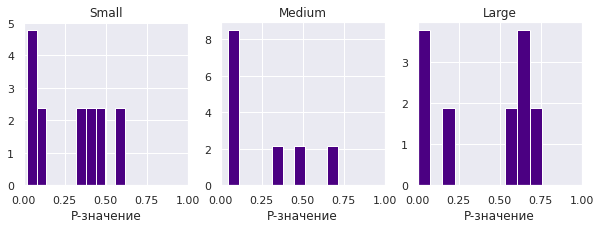

In [ ]:
# Новый список для заполнения P-значения
p_value = [] 
# Словарь объёмов торгов для функции и графиков
sizes = {'Small': 1,'Medium': 2,'Large': 3} 
# Конкретный год (2019) для рассмотрения отдельно
year = 2019

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']
# Таблица с P-значениями при определённых объёмах торгов 
df_year = pd.DataFrame(columns = sizes.keys())

for ticker in tickers:
  l_p = [] # Списки p-value для разных объемов продаж
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  # Список с периодами (на какие индексы мы разбиваем наши данные: start и end) 
  a = tab_date[ticker][2017] + tab_date[ticker][2018] 
  b = tab_date[ticker][2017] + tab_date[ticker][2018] + tab_date[ticker][2019] 
  period_array = [a,b]
  # Циклом пройдёмся по разным объёмам торгов
  for i in sizes.values():
    # Считаем P-значение с помощью функции, написанной выше
    l_p.append(Pirsons_volume(file, size=i, start=period_array[0], end=period_array[1]-1)[1])

  # Суммируем общее p_value 
  df_year.loc[ticker] = l_p
  p_value += l_p

# Построим гистограммы и сохраним их в формате jpeg 
fig,ax = plt.subplots(1,3,figsize=(10,3))
sns.set()
size=list(sizes.keys())
# Циклом пройдёмся по каждой выборке и построим соответвующую ей гистограмму 
for i in range(3):
  ax[i].hist(df_year[size[i]],bins=10, density=True, color = '#4B0082')
  ax[i].set_xlim(0,1)
  ax[i].set_title(size[i])
  ax[i].set_xlabel('P-значение', fontsize=12)
# Сохраним картинку
plt.savefig(f"Таблицы и графики/Рис.10 Гистограммы P-значения критерия Пирсона для реальных данных за {year} год.jpeg")

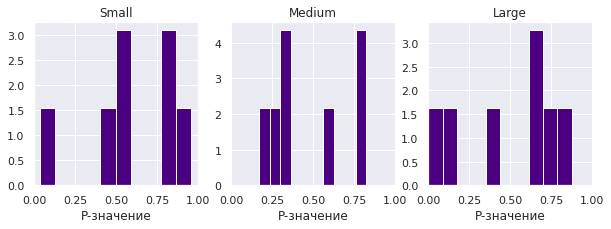

In [ ]:
# Новый список для заполнения P-значения
p_value = [] 
# Словарь объёмов торгов для функции и графиков
sizes = {'Small': 1,'Medium': 2,'Large': 3} 
# Конкретный год (2019) для рассмотрения отдельно
year = 2019

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']
# Таблица с P-значениями при определённых объёмах торгов 
df_year = pd.DataFrame(columns = sizes.keys())

# Циклом пройдёмся по всем тикерам
for index,ticker in enumerate(tickers):
  l_p = [] # Списки p-value для разных объемов продаж
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  
  # all_data - это изначально обработанный датафрейм со всеми акциями (см.выше)
  dframe = all_data[index]
  dframe['date'] = pd.to_datetime(dframe['date']) # Преобразуем данные в нужный тип даты
  dframe = dframe.set_index('date') 
  data_per_q = dframe.ticker.resample('Q').count().to_period('Q') # По кварталам


  # Список с периодами (на какие индексы мы разбиваем наши данные: start и end)
  a = data_per_q[str(year)+'Q1'] + data_per_q[str(year)+'Q2']   
  b = data_per_q[str(year)+'Q1'] + data_per_q[str(year)+'Q2'] + data_per_q[str(year)+'Q3'] + data_per_q[str(year)+'Q4'] 
  period_array = [a,b]
  # Циклом пройдёмся по разным объёмам торгов
  for i in sizes.values():
    # Считаем P-значение с помощью функции, написанной выше
    l_p.append(Pirsons_volume(file, size=i, start=period_array[0], end=period_array[1]-1)[1])

  # Суммируем общее p_value 
  df_year.loc[ticker] = l_p
  p_value += l_p

# Построим гистограммы и сохраним их в формате jpeg 
fig,ax = plt.subplots(1,3,figsize=(10,3))
sns.set()
size=list(sizes.keys())
# Циклом пройдёмся по каждой выборке и построим соответвующую ей гистограмму 
for i in range(3):
  ax[i].hist(df_year[size[i]],bins=10, density=True, color = '#4B0082')
  ax[i].set_xlim(0,1)
  ax[i].set_title(size[i])
  ax[i].set_xlabel('P-значение', fontsize=12)
# Сохраним картинку
plt.savefig(f"Таблицы и графики/Рис.11 Гистограммы P-значения критерия Пирсона для реальных данных за вторую половину {year} года.jpeg")

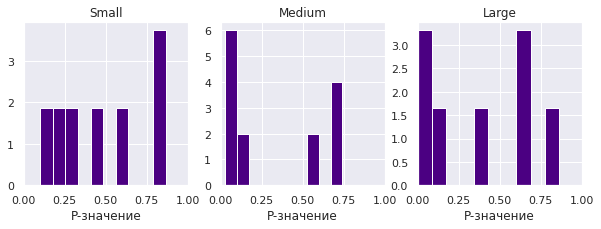

In [ ]:
# Новый список для заполнения P-значения
p_value = [] 
# Словарь объёмов торгов для функции и графиков
sizes = {'Small': 1,'Medium': 2,'Large': 3} 
# Конкретный год (2019) для рассмотрения отдельно
year = 2019

# Список тикеров
tickers = ['AFLT', 'GMKN', 'LKOH','MAGN', 'ROSN', 'SBER', 'VTBR']
# Таблица с P-значениями при определённых объёмах торгов 
df_year = pd.DataFrame(columns = sizes.keys())

# Циклом пройдёмся по всем тикерам
for index,ticker in enumerate(tickers):
  l_p = [] # Списки p-value для разных объемов продаж
  # Укажим путь к файлу 
  file = 'Котировки акций/'+ticker+'_1day_01012017_01012022.txt'
  
  # all_data - это изначально обработанный датафрейм со всеми акциями (см.выше)
  dframe = all_data[index]
  dframe['date'] = pd.to_datetime(dframe['date']) # Преобразуем данные в нужный тип даты
  dframe = dframe.set_index('date') 
  data_per_q = dframe.ticker.resample('Q').count().to_period('Q') # По кварталам


  # Список с периодами (на какие индексы мы разбиваем наши данные: start и end)
  a = data_per_q[str(year)+'Q1'] + data_per_q[str(year)+'Q2'] + data_per_q[str(year)+'Q3']
  b = data_per_q[str(year)+'Q1'] + data_per_q[str(year)+'Q2'] + data_per_q[str(year)+'Q3'] + data_per_q[str(year)+'Q4']
  period_array = [a,b]
  # Циклом пройдёмся по разным объёмам торгов
  for i in sizes.values():
    # Считаем P-значение с помощью функции, написанной выше
    l_p.append(Pirsons_volume(file, size=i, start=period_array[0], end=period_array[1]-1)[1])

  # Суммируем общее p_value 
  df_year.loc[ticker] = l_p
  p_value += l_p

# Построим гистограммы и сохраним их в формате jpeg 
fig,ax = plt.subplots(1,3,figsize=(10,3))
sns.set()
size=list(sizes.keys())
# Циклом пройдёмся по каждой выборке и построим соответвующую ей гистограмму
for i in range(3):
  ax[i].hist(df_year[size[i]],bins=10, density=True, color = '#4B0082')
  ax[i].set_xlim(0,1)
  ax[i].set_title(size[i])
  ax[i].set_xlabel('P-значение', fontsize=12)
# Сохраним картинку
plt.savefig(f"Таблицы и графики/Рис.12 Гистограммы P-значения критерия Пирсона для реальных данных за 3 квартал {year} года.jpeg")